In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_PATH = '/run/media/neotod/joint/multimedia/photos/animals/cat_yawning.png'

img = cv2.cvtColor(cv2.imread(IMG_PATH), cv2.COLOR_BGR2BGRA)

In [4]:
img_gray = img[:, :, 2]

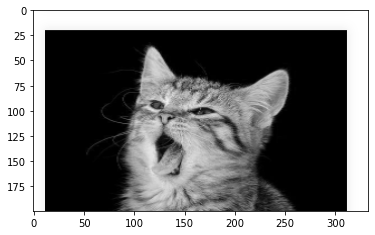

In [5]:
plt.imshow(img_gray, cmap='gray')

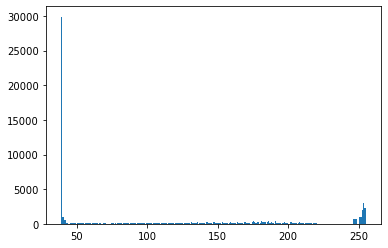

In [6]:
plt.hist(img_gray.ravel(), bins=256);

In [7]:
# log transformation

c = 2
s = c*np.log10(1 + img_gray)

/tmp/ipykernel_9648/1492396063.py:4: RuntimeWarning: divide by zero encountered in log10
  s = c*np.log10(1 + img_gray)


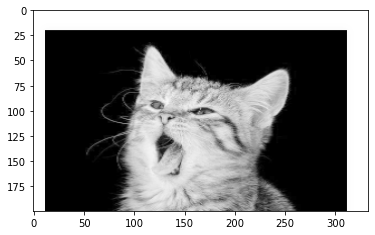

In [8]:
plt.imshow(s, cmap='gray')

In [9]:
img_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255]], dtype=uint8)

In [10]:
s[s == -np.inf] = 0

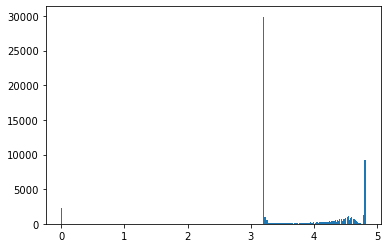

In [11]:
plt.hist(s.ravel(), bins=256);

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

In [12]:
IMG1_PATH = './1.png'
img1 = cv2.imread(IMG1_PATH, cv2.COLOR_BGR2GRAY)

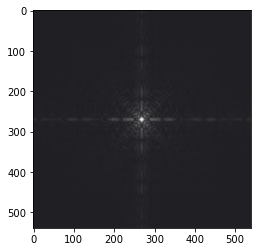

In [13]:
plt.imshow(img1)

In [14]:
tmp = np.sort(img1.ravel())

In [15]:
tmp[tmp == tmp].shape

(871563,)

In [16]:
img1.ravel()

array([32, 31, 35, ..., 32, 31, 35], dtype=uint8)

In [17]:
np.quantile(img1.ravel(), 0.)

31.0

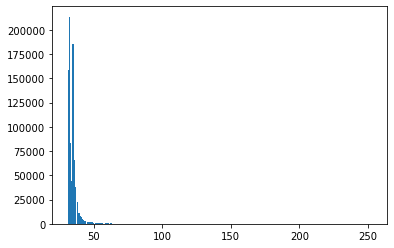

In [18]:
plt.hist(img1.ravel(), bins=256);

In [19]:
c2 = 3
s2 = c2*np.log(1 + img1)

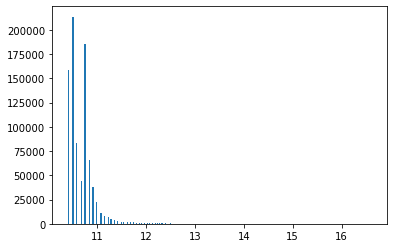

In [20]:
plt.hist(s2.ravel(), bins=256);

In [21]:
s2.astype(int)

array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]])

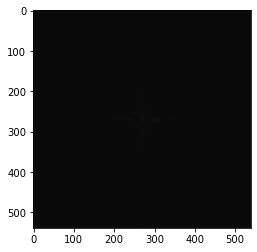

In [22]:
plt.imshow(s2.astype(int));

----------------

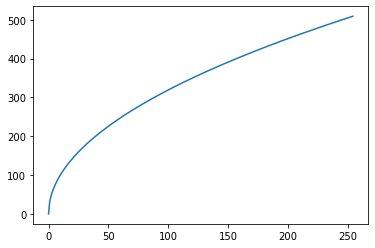

In [62]:
c = 2
gamma = 0.5

s3 = c*np.power(img1 / 255, gamma) * 255

x = np.arange(0, 255)
y = c*np.power(x/255, gamma) * 255

plt.plot(x, y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


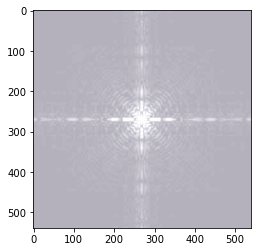

In [63]:
plt.imshow(s3.astype(int), cmap='gray')

In [64]:
IMG3_PATH = '/run/media/neotod/joint/multimedia/photos/lp/chester_to_the_sky.png'

img3 = cv2.cvtColor(cv2.imread(IMG3_PATH), cv2.COLOR_BGR2RGB)

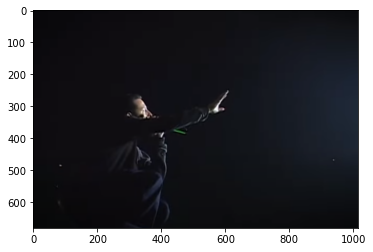

In [65]:
plt.imshow(img3)

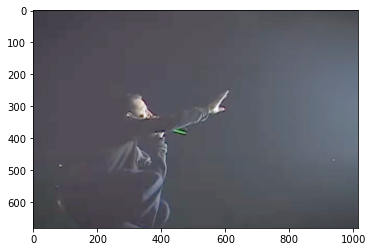

In [82]:
def gamma_correct(img, coeff, gamma, n_channels=3):
    s = coeff*np.power(img / 255, gamma) * 255
    
    return s.astype(int)

plt.imshow(gamma_correct(img3, 1, 0.4))

In [83]:
IMG4_PATH = './2.png'

img4 = cv2.cvtColor(cv2.imread(IMG4_PATH), cv2.COLOR_BGR2RGB)

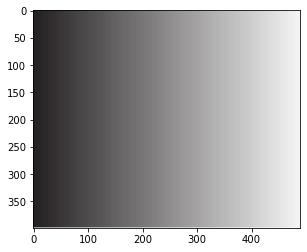

In [87]:
plt.imshow(img4)

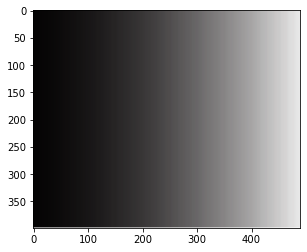

In [88]:
plt.imshow(gamma_correct(img4, 1, 2))

In [6]:
IMG4_PATH = './3.png'

img4 = cv2.cvtColor(cv2.imread(IMG4_PATH), cv2.COLOR_BGR2RGB)

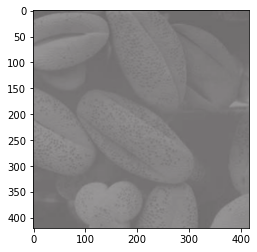

In [7]:
plt.imshow(img4)

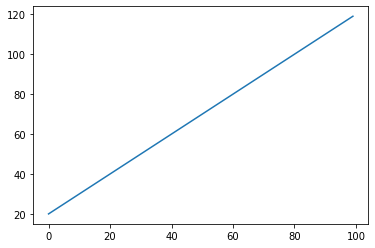

In [8]:
x1 = 10
x2 = 20
y1 = 30
y2 = 40

m = (y2-y1)/(x2-x1)
b = y2 - m*x2

xs = np.arange(0, 100)
y = m*xs + b

plt.plot(xs, y)

In [6]:
xs = np.arange(0, 100)
y = m*xs + b

In [18]:
img4 = cv2.resize(img4, (420, 420))

In [12]:
img4_gray = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)

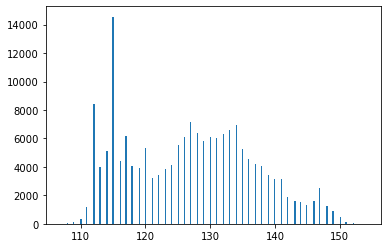

In [38]:
plt.hist(img4_gray.ravel(), bins=256);

In [10]:


def threshold_1d(img, r1, s1, r2, s2, max_=255):
    # contrast stretching for 1d image (gray)
    
    y1 = lambda r: r1*r
    
    def y2(r):
        m = (s2-s1)/(r2-r1)
        b = s2 - m*r2
        
        return m*r + b

    def y3(r):
        m = (max_-s2)/(max_-s2)
        b = max_ - m*max_
        
        return m*r + b
    
    img_shape = img.shape
    tmp = img.ravel()
    
    tmp[tmp < r1] = y1(tmp[tmp < r1]).astype(int)

    cond2 = (r1 < tmp) & (tmp < r2)
    tmp[cond2] = y2(tmp[cond2]).astype(int)
    
    tmp[r2 < tmp] = y3(tmp[r2 < tmp]).astype(int)
    
    return tmp.reshape(img_shape)

In [13]:
tmp = img4_gray.ravel()
tmp[tmp < r1] = 0

NameError: name 'r1' is not defined

In [ ]:
img4_gray

In [14]:
(r1, s1) = (0, 255 / 2)
(r2, s2) = (255, 255 / 2)


res = threshold_gray(img4_gray, r1, s1, r2, s2)

# threshold() --> it's workingggggg!!!!

NameError: name 'threshold_gray' is not defined

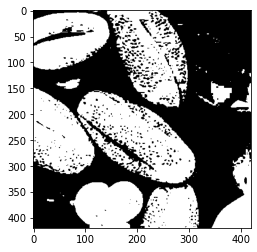

In [90]:
plt.imshow(res, cmap='gray')

In [15]:
IMG5_PATH = './after_contrast_stretching.png'

img5 = cv2.cvtColor(cv2.imread(IMG5_PATH), cv2.COLOR_BGR2RGB)

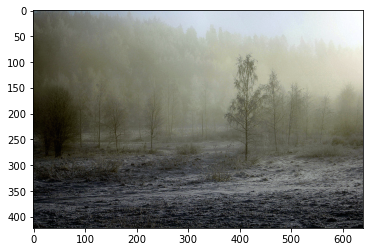

In [16]:
plt.imshow(img5)

In [17]:
img5.shape

(422, 639, 3)

In [36]:
IMG6_PATH = '/run/media/neotod/joint/multimedia/photos/zzzz.jpeg'

img6 = cv2.cvtColor(cv2.imread(IMG6_PATH), cv2.COLOR_BGR2RGB)

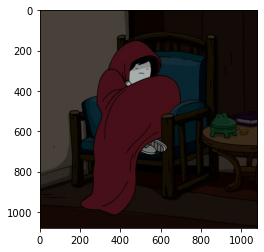

In [37]:
img6_fix = cv2.resize(img6, (1080, 1080))
plt.imshow(img6_fix)

In [35]:
def threshold_rgb(img, r1, s1, r2, s2, max_=255):
    img[:, :, 0] = threshold_1d(img[:, :, 0], r1, s1, r2, s2)
    img[:, :, 1] = threshold_1d(img[:, :, 1], r1, s1, r2, s2)
    img[:, :, 2] = threshold_1d(img[:, :, 2], r1, s1, r2, s2)
    
    return img


In [51]:
MAX = 255
DIFF = 40

(r21, s21) = (DIFF, DIFF)
(r22, s22) = (MAX - DIFF, MAX - DIFF)

img6_thresh = threshold_rgb(img6_fix.copy(), r21, s21, r22, s22)

In [29]:
img6_thresh.shape

(1080, 1080, 3)

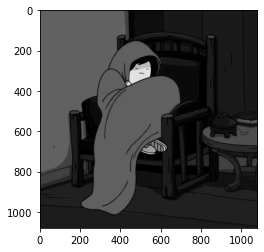

In [58]:
plt.imshow(img6_fix[:, :, 0], cmap='gray')

In [61]:
(r31, s31) = (2*51, 255)
(r32, s32) = (2*51, 255 / 2)

plt.imshow(threshold_1d(img6_fix[:, :, 0], r31, s31, r32, s32), cmap='gray')

ZeroDivisionError: float division by zero

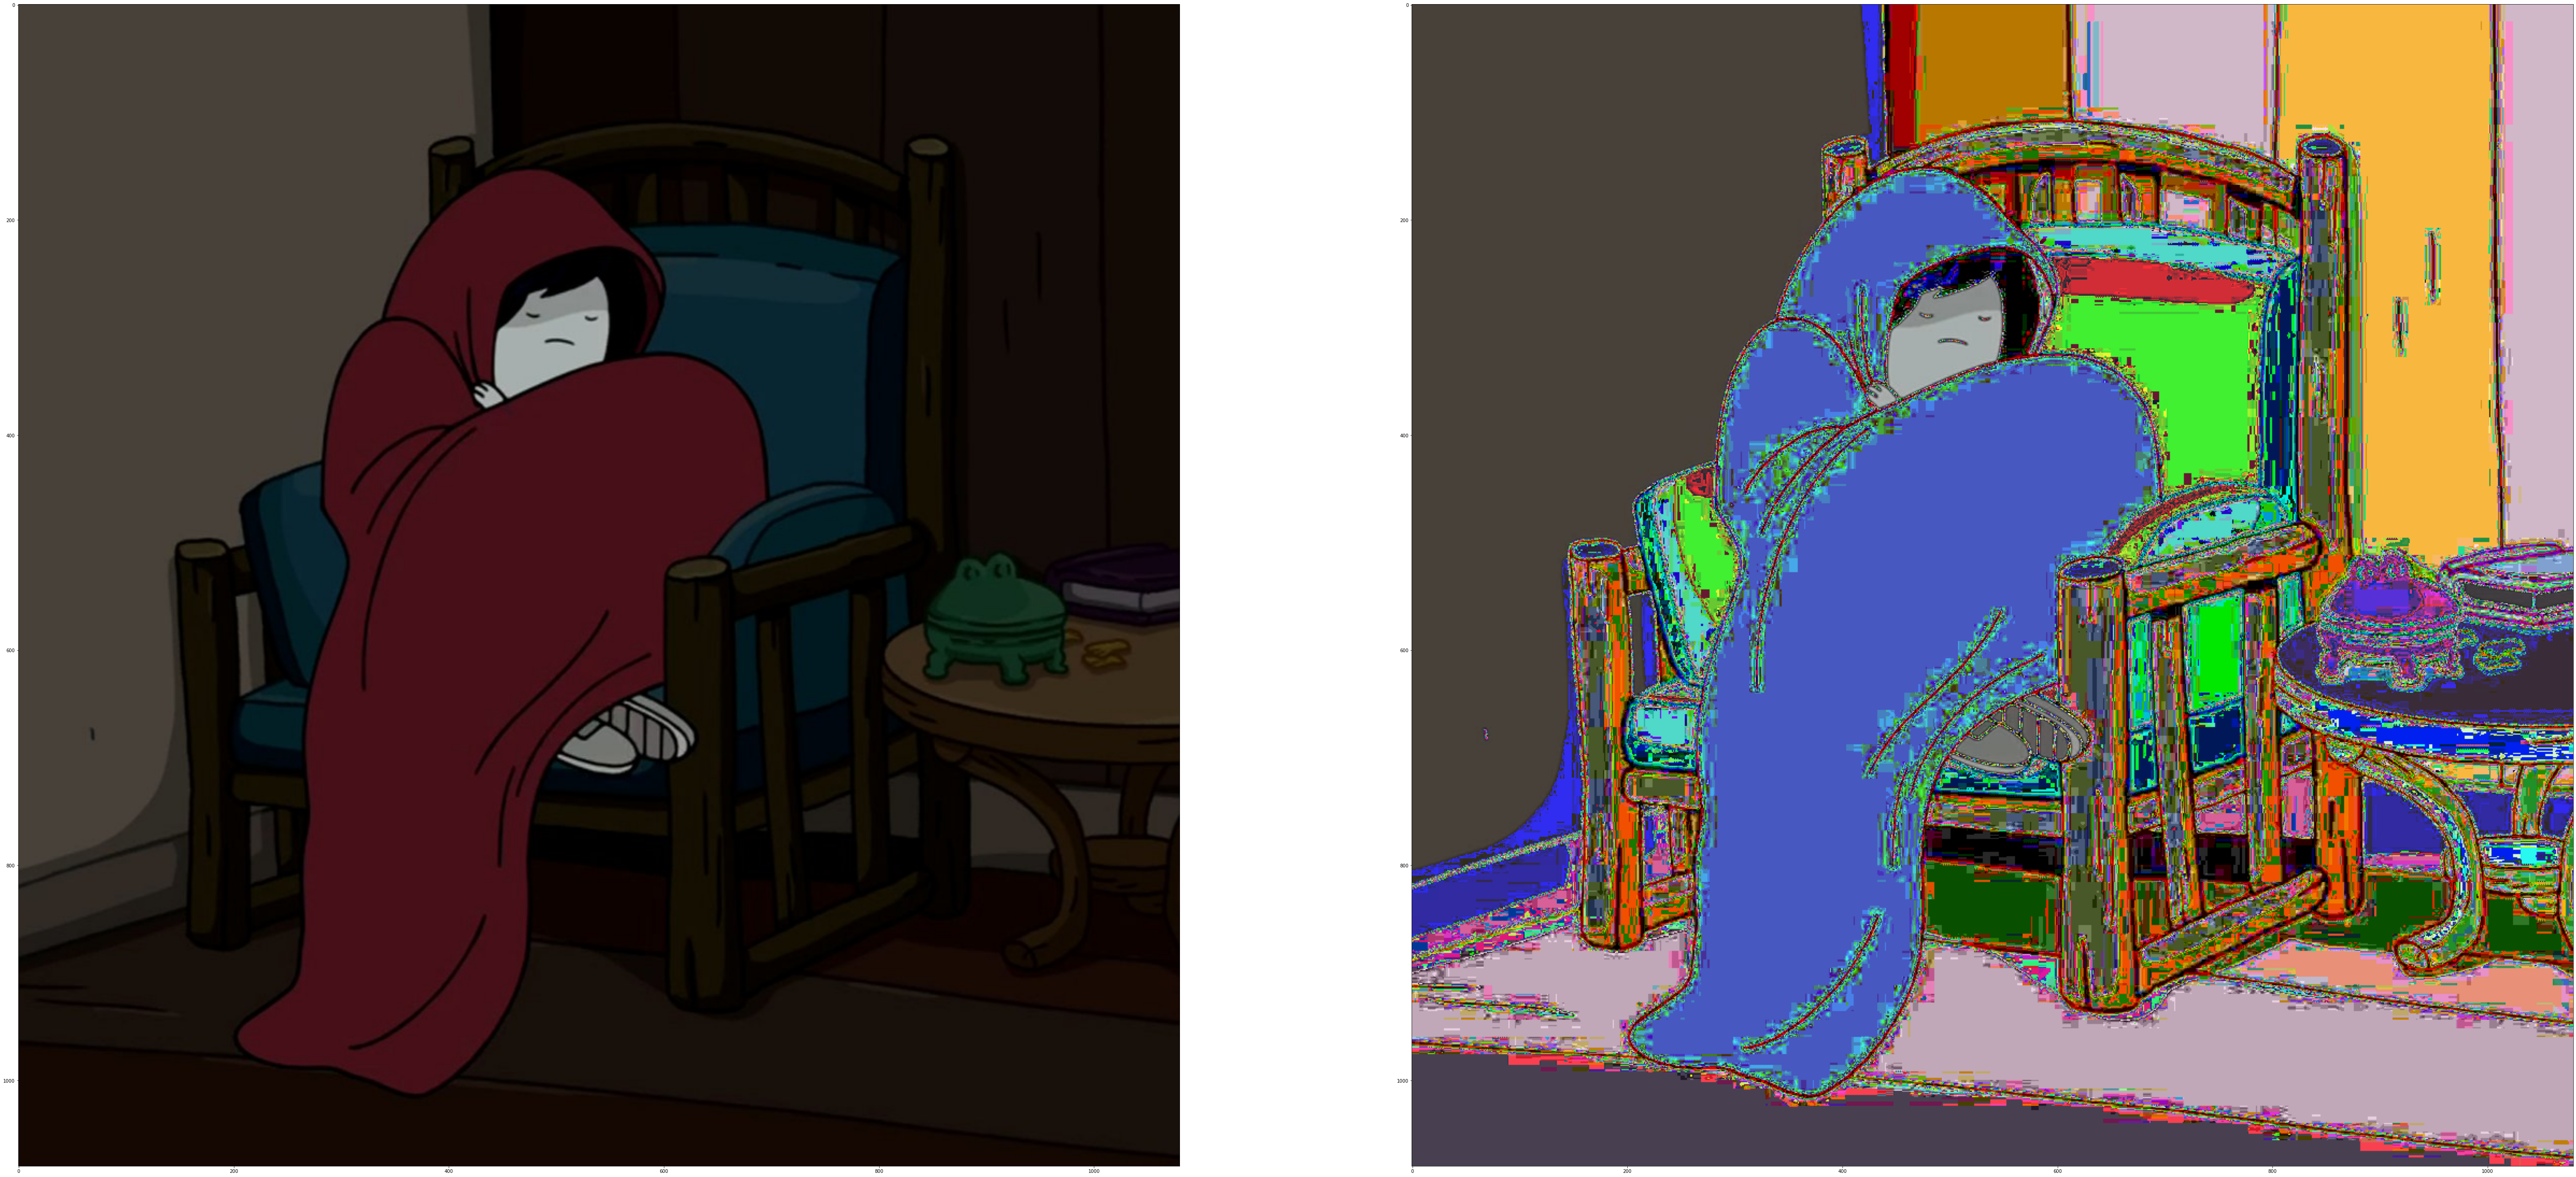

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(100, 50))

ax[0].imshow(img6_fix)
ax[1].imshow(img6_thresh)

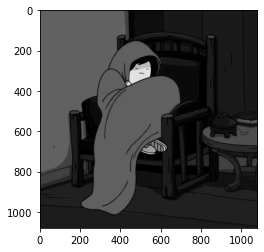

In [65]:
img6_gray = img6_fix[:, :, 0]

plt.imshow(img6_gray, cmap='gray')

In [106]:
def img_1d_to_bitslices(img, width=8):
    res = np.zeros(img.shape)
    
    for i in range(img.shape[0]):
#         res[i, :] = [
#             np.binary_repr(pixel_val, width=width) for pixel_val in img[i]
#         ]
        
        res[i, :] = [
            np.binary_repr(pixel_val, width=width) for pixel_val in img[i]
        ]
        
    return res
        

In [107]:
tmp  =img_1d_to_bitslices(img6_gray)

In [108]:
tmp[0][0]

'0'

In [105]:
img6_gray[0][0]

72

In [104]:
np.binary_repr(img6_gray[0][0], width=8)

'01001000'